<img src="images/whisky_banner.jpg" style="width:80%;height:80%;">
<h1 style="font-size:30px;"><center>Scotch Reviews</center></h1>

My attempts to explore and analyze a data set containing 2,2k+ reviews of Scotch. The dataset was found <a href="https://www.kaggle.com/koki25ando/22000-scotch-whisky-reviews">here</a>.

## A few ideas of things to explore
* Data exploration
    * Unique categories
    * Price histogram
    * Overall Brand Score
    * Is more expensive better?
* Machine Learning
    * Flavour decoding from description using NLP -> Feature engineering
    * Clustering using the newly gained info

In [65]:
# Import standard modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Plot settings
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [11]:
# Read data
df = pd.read_csv('scotch_review.csv')
df = df.drop(columns = 'Unnamed: 0')
df = df.drop(columns = 'currency')

In [12]:
# Explore dataframe
df.head(10)

,name,category,review.point,price,description
0,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,"Magnificently powerful and intense. Caramels, ..."
1,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00,What impresses me most is how this whisky evol...
2,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00,There have been some legendary Bowmores from t...
3,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,With a name inspired by a 1926 Buster Keaton m...
4,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,"Captivating, enticing, and wonderfully charmin..."
5,"Ardbeg Corryvreckan, 57.1%",Single Malt Scotch,96,85.00,"Powerful, muscular, well-textured, and invigor..."
6,"Gold Bowmore, 1964 vintage, 42.4%",Single Malt Scotch,96,6250.00,Deep gold color. Surprisingly lively on the no...
7,"Bowmore, 40 year old, 44.8%",Single Malt Scotch,96,11000.00,"Definitely showing its age, but not in a bad w..."
8,"The Dalmore, 50 year old, 52.8%",Single Malt Scotch,96,1500.00,The Dalmore is one of a handful of whiskies th...
9,"Glenfarclas Family Casks 1954 Cask #1260, 47.2%",Single Malt Scotch,96,3360,A rich amber color and elegantly oxidized note...


## Data Exploration

In [62]:
print('* The dataframe consists of {} reviews and has {} features.'.format(df.shape[0], df.shape[1]))
print('* The features are: {}.'.format(", ".join(df.columns)))
print('* The categories consists of {}.'.format(", ".join(df.category.unique())))
text = " ".join(review for review in df.description)
print ("* There are {} words in the combination of all review.".format(len(text)))

* The dataframe consists of 2247 reviews and has 5 features.
* The features are: name, category, review.point, price, description.
* The categories consists of Blended Scotch Whisky, Single Malt Scotch, Blended Malt Scotch Whisky, Grain Scotch Whisky, Single Grain Whisky.
* There are 989426 words in the combination of all review.


In [63]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "note", "notes", "whisky", "flavor", "flavors", "palate", "nose", "year", "old", "hint",
                 "bottling", "bottle", "bottles", "age", "distillery", "single", "malt", "character", "cask",
                 "cask", "strength", "range", "mix", "length", "medium", "aged", "much", "water", "first", "fill"
                 "time", "rather", "date", "finish", "initially", "expression", "bottled", "better", "whiskies",
                 "quite", "little", "add", "long"])

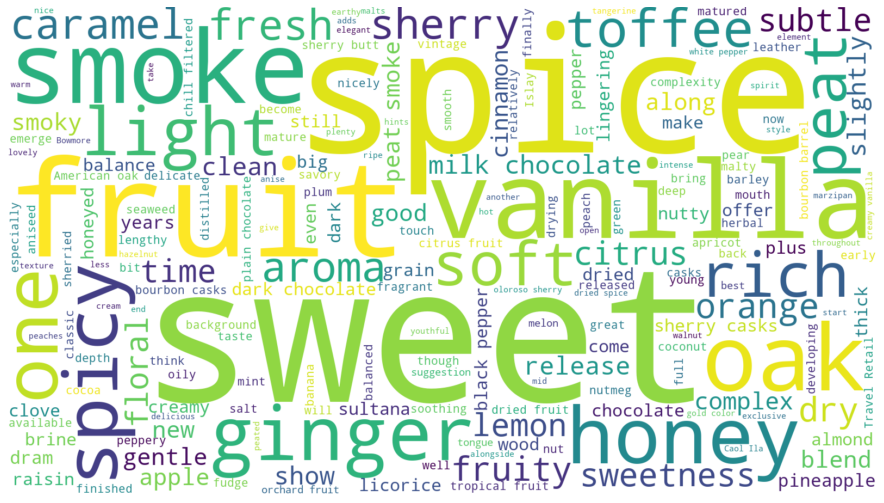

In [64]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1600, height=900).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()